In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt


In [5]:
dataset = pd.read_csv("SVM_dataset.csv")
dataset.head()

,Age,Mobile Phone,Purchased
0,15.0,6334.0,0.0
1,28.0,6667.0,0.0
2,20.0,14334.0,0.0
3,21.0,19000.0,0.0
4,15.0,25334.0,0.0


In [6]:
dataset.shape

(999, 3)

In [16]:
X = dataset.iloc[0:199 , :-1].values
y = dataset.iloc[0:199 , -1].values

In [28]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X, y , test_size=0.3 ,  random_state=21)

In [29]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train= sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [30]:
from sklearn.svm import SVC 
classifier = SVC(kernel='rbf' , random_state=42)
classifier.fit(X_train ,  y_train )



SVC(random_state=42)

In [31]:
print(classifier.predict(sc.transform([[15 ,6334 ]])))

[0.]


In [32]:
y_pred=classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [0. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 0.]
 [0. 1.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 0.]
 [0. 0.]
 [0. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]]


In [33]:
from sklearn.metrics import confusion_matrix , accuracy_score 
print(confusion_matrix(y_pred, y_test))
accuracy_score(y_pred , y_test)

[[34  3]
 [ 3 20]]


0.9

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


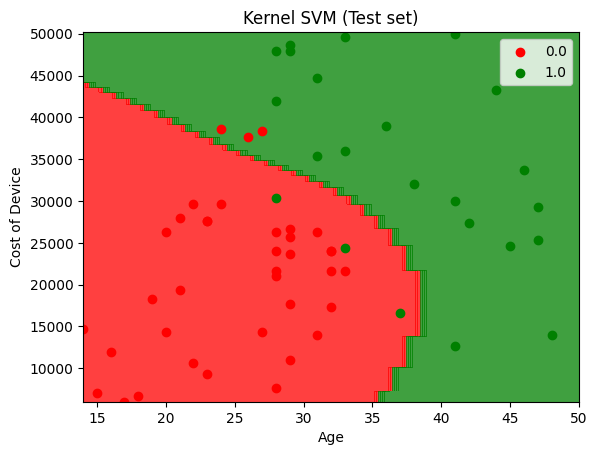

In [35]:
#Visualizing the TestSet result  
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 0, stop = X_set[:, 0].max() + 3, step = 1),
                     np.arange(start = X_set[:, 1].min() - 0, stop = X_set[:, 1].max() + 200, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Kernel SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Cost of Device')
plt.legend()
plt.show()